<a href="https://colab.research.google.com/github/yenlungLai/Adversary-Example-through-Relativity/blob/main/TESTFACE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.1 MB/s eta 0:00:00


In [2]:
import cv2 as cv
import os
import tensorflow as tf
import matplotlib.pyplot as plt


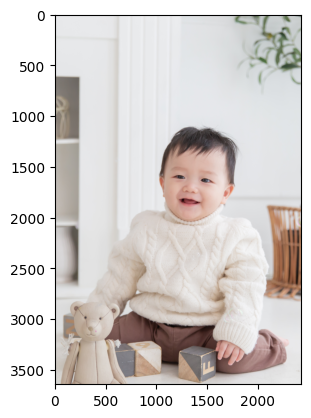

In [4]:
img=cv.imread('carson_test.jpg')
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)

In [5]:
from mtcnn.mtcnn import MTCNN
import numpy as np



detector=MTCNN()
result=detector.detect_faces(img)


1/1 [==============================] - 0s 166ms/step


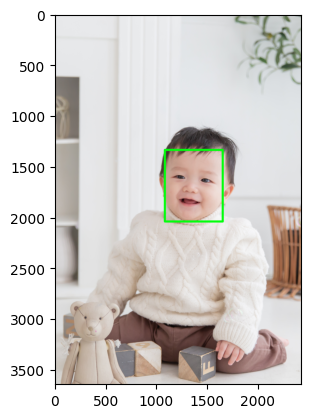

In [6]:
x,y,w,h=result[0]['box']
img=cv.rectangle(img,(x,y),(x+w,y+h),(0,255,11),20)
plt.imshow(img)

array([[[  0, 255,  11],
        [  0, 255,  11],
        [  0, 255,  11],
        ...,
        [  0, 255,  11],
        [  0, 255,  11],
        [  0, 255,  11]],

       [[  0, 255,  11],
        [  0, 255,  11],
        [  0, 255,  11],
        ...,
        [  0, 255,  11],
        [  0, 255,  11],
        [  0, 255,  11]],

       [[  0, 255,  11],
        [  0, 255,  11],
        [  0, 255,  11],
        ...,
        [  0, 255,  11],
        [  0, 255,  11],
        [  0, 255,  11]],

       ...,

       [[  0, 255,  11],
        [  0, 255,  11],
        [  0, 255,  11],
        ...,
        [  0, 255,  11],
        [  0, 255,  11],
        [  0, 255,  11]],

       [[  0, 255,  11],
        [  0, 255,  11],
        [  0, 255,  11],
        ...,
        [  0, 255,  11],
        [  0, 255,  11],
        [  0, 255,  11]],

       [[  0, 255,  11],
        [  0, 255,  11],
        [  0, 255,  11],
        ...,
        [  0, 255,  11],
        [  0, 255,  11],
        [  0, 255,  11]]

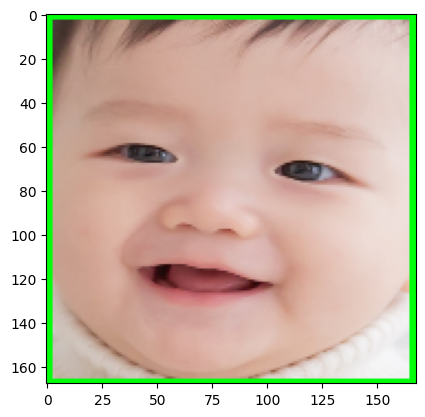

In [7]:
faceimg=img[y:y+h,x:x+w]
faceresized=cv.resize(faceimg,(168,168))
plt.imshow(faceresized)
faceresized

**AUTOMATE TAKE PLACE**

In [10]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()


    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr


    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)

        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(10,8))
        for num,image in enumerate(X):
            ncols = 5
            nrows = len(Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

In [12]:
faceloading = FACELOADING('Dataset')
X, Y = faceloading.load_classes()

1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 0s 33ms/step
Loaded successfully: 9
1/1 [==============================] - 0s 59ms/step
Loaded successfully: 9
Loaded successfully: 0


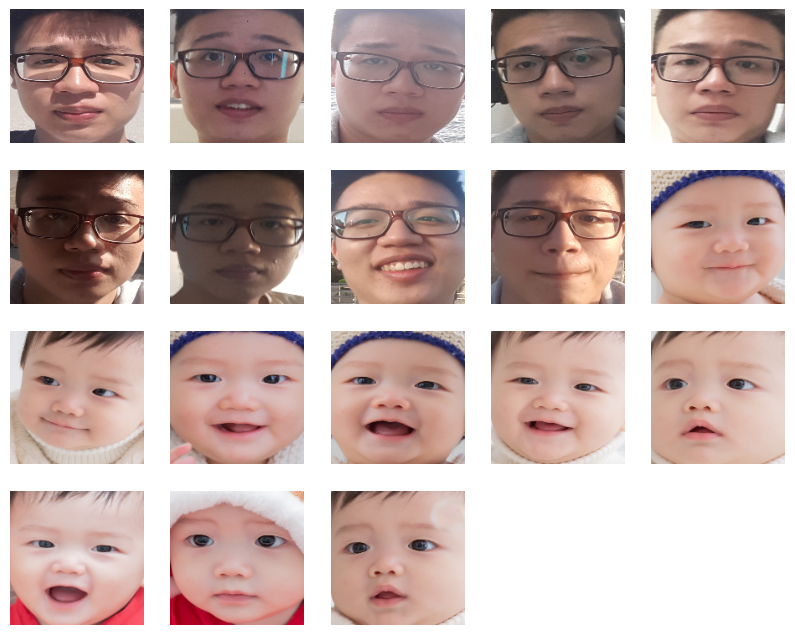

In [13]:
faceloading.plot_images()

**FACENET PART**


In [14]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=86b3a95f0ec95a06a9dac75159ce18bd39b89ea5b917c8ee509ba55fa0f3bbac
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [15]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0)
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)

In [16]:
# Get the output layer
output_layer = embedder.model.layers[-1]

# Display details about the output layer
print("Output Layer Name:", output_layer.name)
print("Output Layer Output Shape:", output_layer.output_shape)
print("Output Layer Number of Parameters:", output_layer.count_params())

Output Layer Name: normalize
Output Layer Output Shape: (None, 512)
Output Layer Number of Parameters: 0


In [17]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)


1/1 [==============================] - 0s 85ms/step


In [ ]:
np.savez_compressed('faces_embeddings_done_4classes.npz', EMBEDDED_X, Y)

## **SVM Model**

In [18]:
from sklearn.preprocessing import LabelEncoder

# Instantiate and fit the LabelEncoder
# Instantiate and fit the LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y)

# Transform Y to encoded labels
encoded_Y = encoder.transform(Y)

# Perform inverse transformation to get class names
decoded_Y = encoder.inverse_transform(encoded_Y)

# Print the results
print("Original class labels:", Y)
print("Encoded labels:", encoded_Y)
print("Decoded class names:", decoded_Y)

Original class labels: ['yenlung' 'yenlung' 'yenlung' 'yenlung' 'yenlung' 'yenlung' 'yenlung'
 'yenlung' 'yenlung' 'carson' 'carson' 'carson' 'carson' 'carson' 'carson'
 'carson' 'carson' 'carson']
Encoded labels: [1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
Decoded class names: ['yenlung' 'yenlung' 'yenlung' 'yenlung' 'yenlung' 'yenlung' 'yenlung'
 'yenlung' 'yenlung' 'carson' 'carson' 'carson' 'carson' 'carson' 'carson'
 'carson' 'carson' 'carson']


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, encoded_Y, shuffle=True, random_state=17)

In [20]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [21]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, ypreds_train)

1.0

In [23]:
accuracy_score(Y_test,ypreds_test)

1.0

In [46]:
t_im_yl = cv.imread("/content/yl_test.jpg")
t_im_yl = cv.cvtColor(t_im_yl, cv.COLOR_BGR2RGB)
x1,y1,w1,h1 = detector.detect_faces(t_im_yl)[0]['box']
t_im_yl=cv.rectangle(t_im_yl,(x1,y1),(x1+w1,y1+h1),(0,255,11),20)
t_im_yl = t_im_yl[y1:y1+h1, x1:x1+w1]
t_im_yl = cv.resize(t_im_yl, (160,160))
test_im1 = get_embedding(t_im_yl)



t_im_cars = cv.imread("/content/carson_test.jpg")
t_im_cars = cv.cvtColor(t_im_cars, cv.COLOR_BGR2RGB)
x2,y2,w2,h2 = detector.detect_faces(t_im_cars)[0]['box']
t_im_cars=cv.rectangle(t_im_cars,(x2,y2),(x2+w2,y2+h2),(0,255,11),20)
t_im_cars = t_im_cars[y2:y2+h2, x2:x2+w2]
t_im_cars = cv.resize(t_im_cars, (160,160))
test_im2 = get_embedding(t_im_cars)



1/1 [==============================] - 0s 88ms/step


In [25]:
np.size(test_im2)

512

In [47]:
test_im1 = [test_im1]
test_im2 = [test_im2]
ypreds1 = model.predict(test_im1)
ypreds2 = model.predict(test_im2)


In [53]:
detected_Y = encoder.inverse_transform(ypreds1)



# Print the results
print("Detected Result:", detected_Y[0])

Detected Result: yenlung
